## import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score, ConfusionMatrixDisplay 
import pickle

# to ignore future warnings
import warnings 
warnings.filterwarnings('ignore')

## LOAD DATA

In [29]:
data = pd.read_csv('diabetes_dataset.csv')
data.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


## EXPLORITART DATA ANALYIS AND DATA CLEANING 

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [33]:
data.shape

(100000, 31)

In [35]:
data.size

3100000

In [37]:
data.duplicated().sum()

0

In [39]:
data.isna().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


<Axes: xlabel='gender', ylabel='diagnosed_diabetes'>

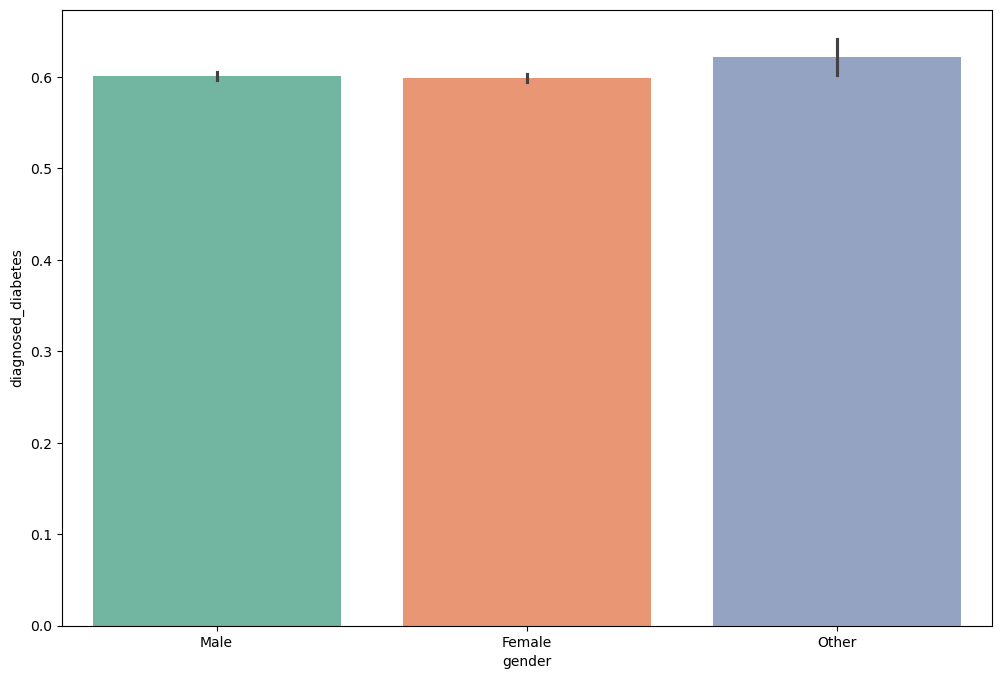

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(x='gender',y='diagnosed_diabetes',data=data,palette='Set2')

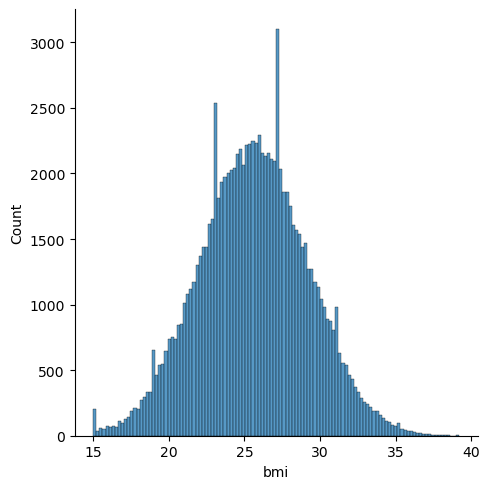

In [59]:
sns.displot(x='bmi',data=data)

<Axes: xlabel='diagnosed_diabetes', ylabel='count'>

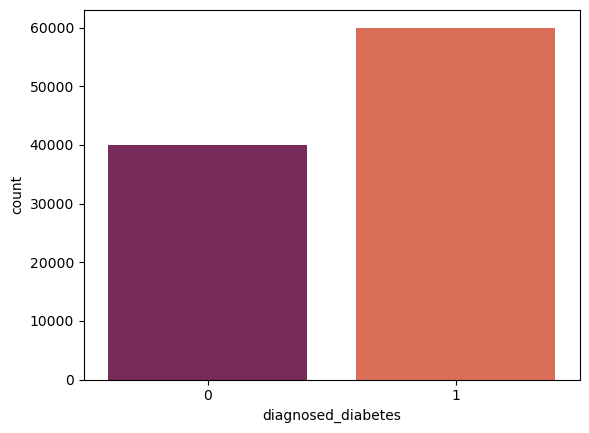

In [65]:
sns.countplot(data=data,x='diagnosed_diabetes',palette='rocket')

<Axes: ylabel='count'>

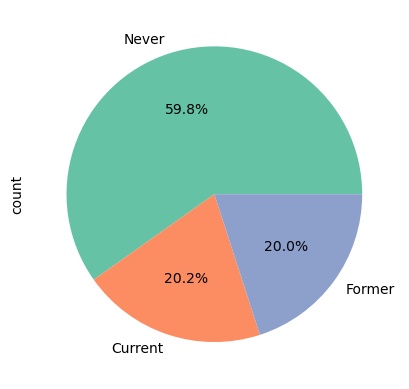

In [73]:
data['smoking_status'].value_counts().plot(kind='pie',autopct='%.1f%%',colors=sns.color_palette('Set2'))

In [129]:
objects=['gender','ethnicity','education_level','income_level','smoking_status','diabetes_stage',]
lb=LabelEncoder()
for i in objects:
    data[i]=lb.fit_transform(data[i])

In [131]:
data['employment_status']=lb.fit_transform(data['employment_status'])

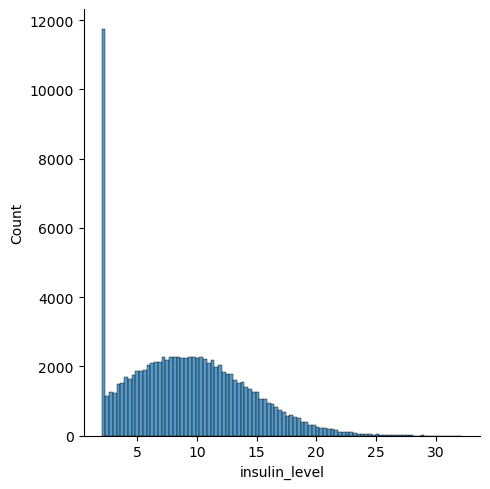

In [91]:
sns.displot(x='insulin_level',data=data)

<Axes: xlabel='diabetes_stage', ylabel='diagnosed_diabetes'>

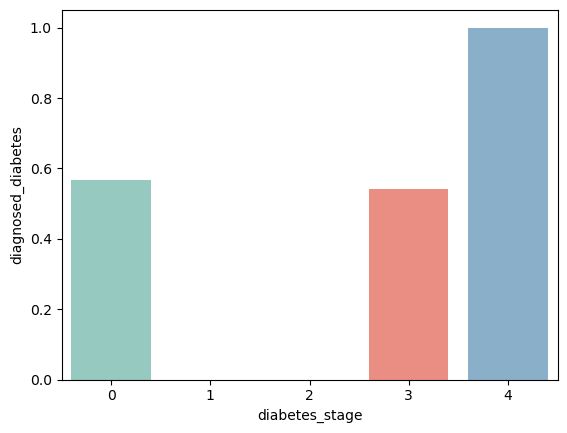

In [95]:
sns.barplot(data=data,x='diabetes_stage',y='diagnosed_diabetes',palette='Set3',ci=None)

<Axes: >

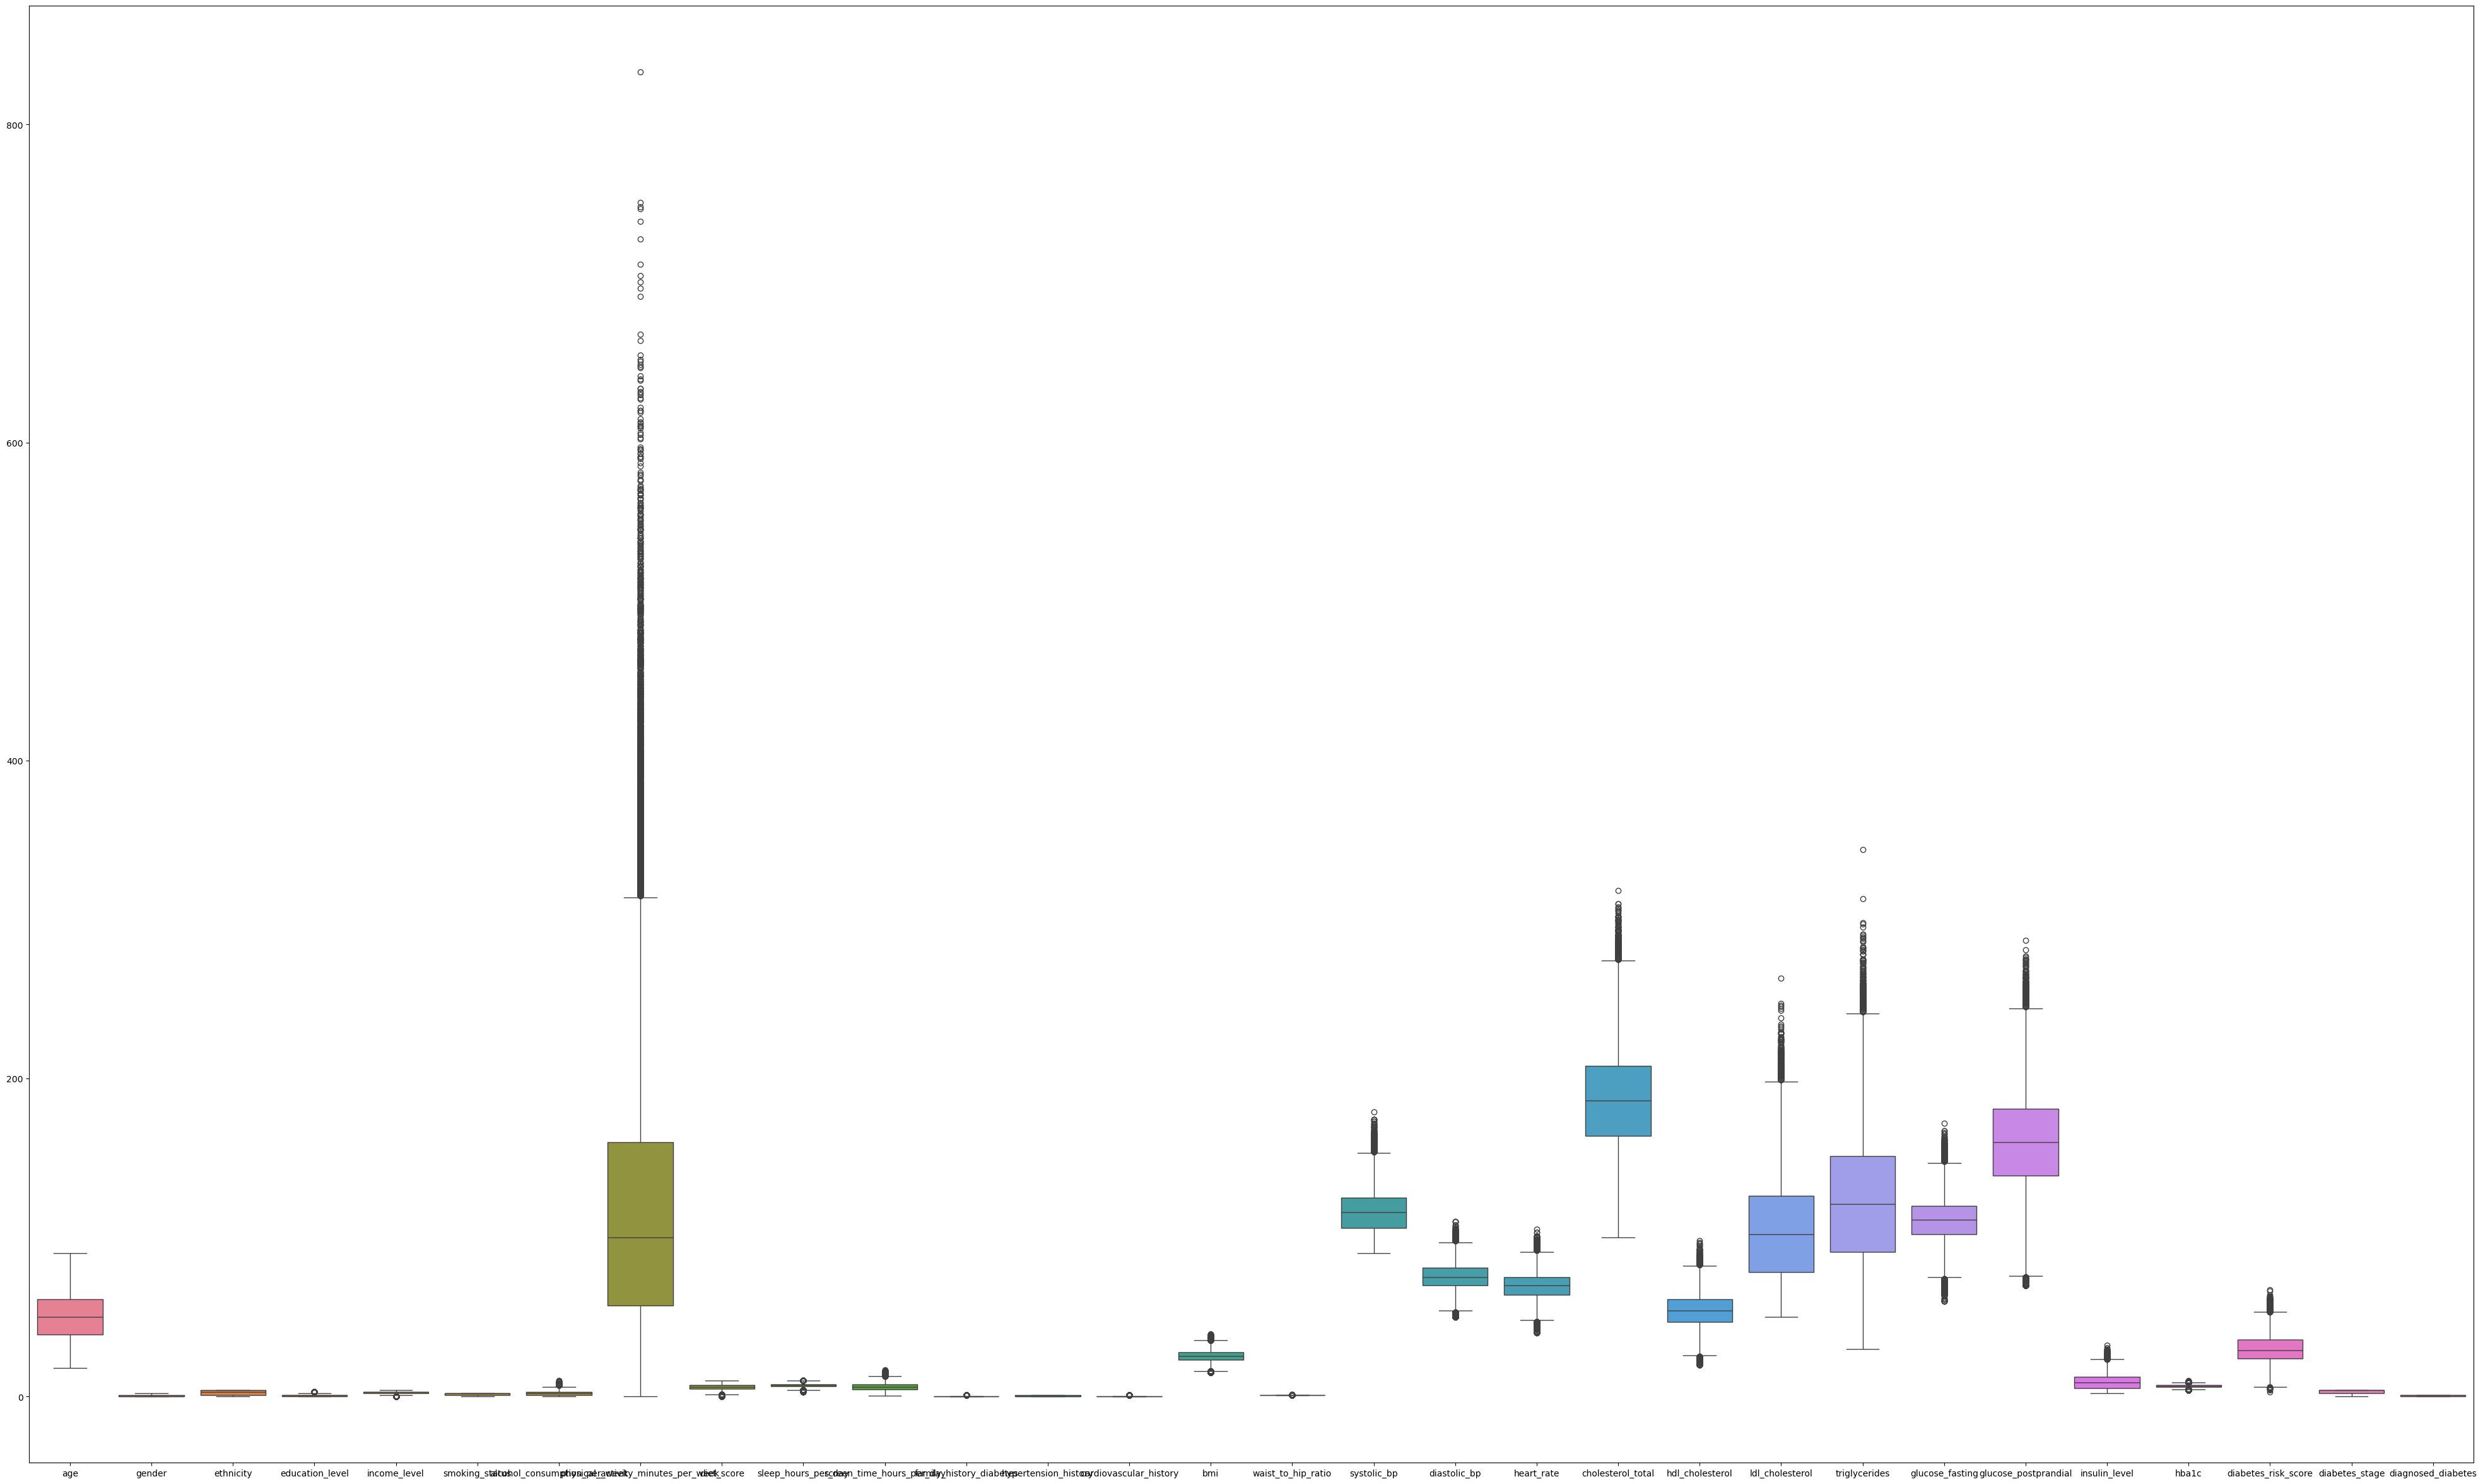

In [99]:
plt.figure(figsize=(50,30))
sns.boxplot(data)

In [119]:
capper = Winsorizer( capping_method='quantiles',tail='both',fold=0.05,)
data=capper.fit_transform(data)

<Axes: >

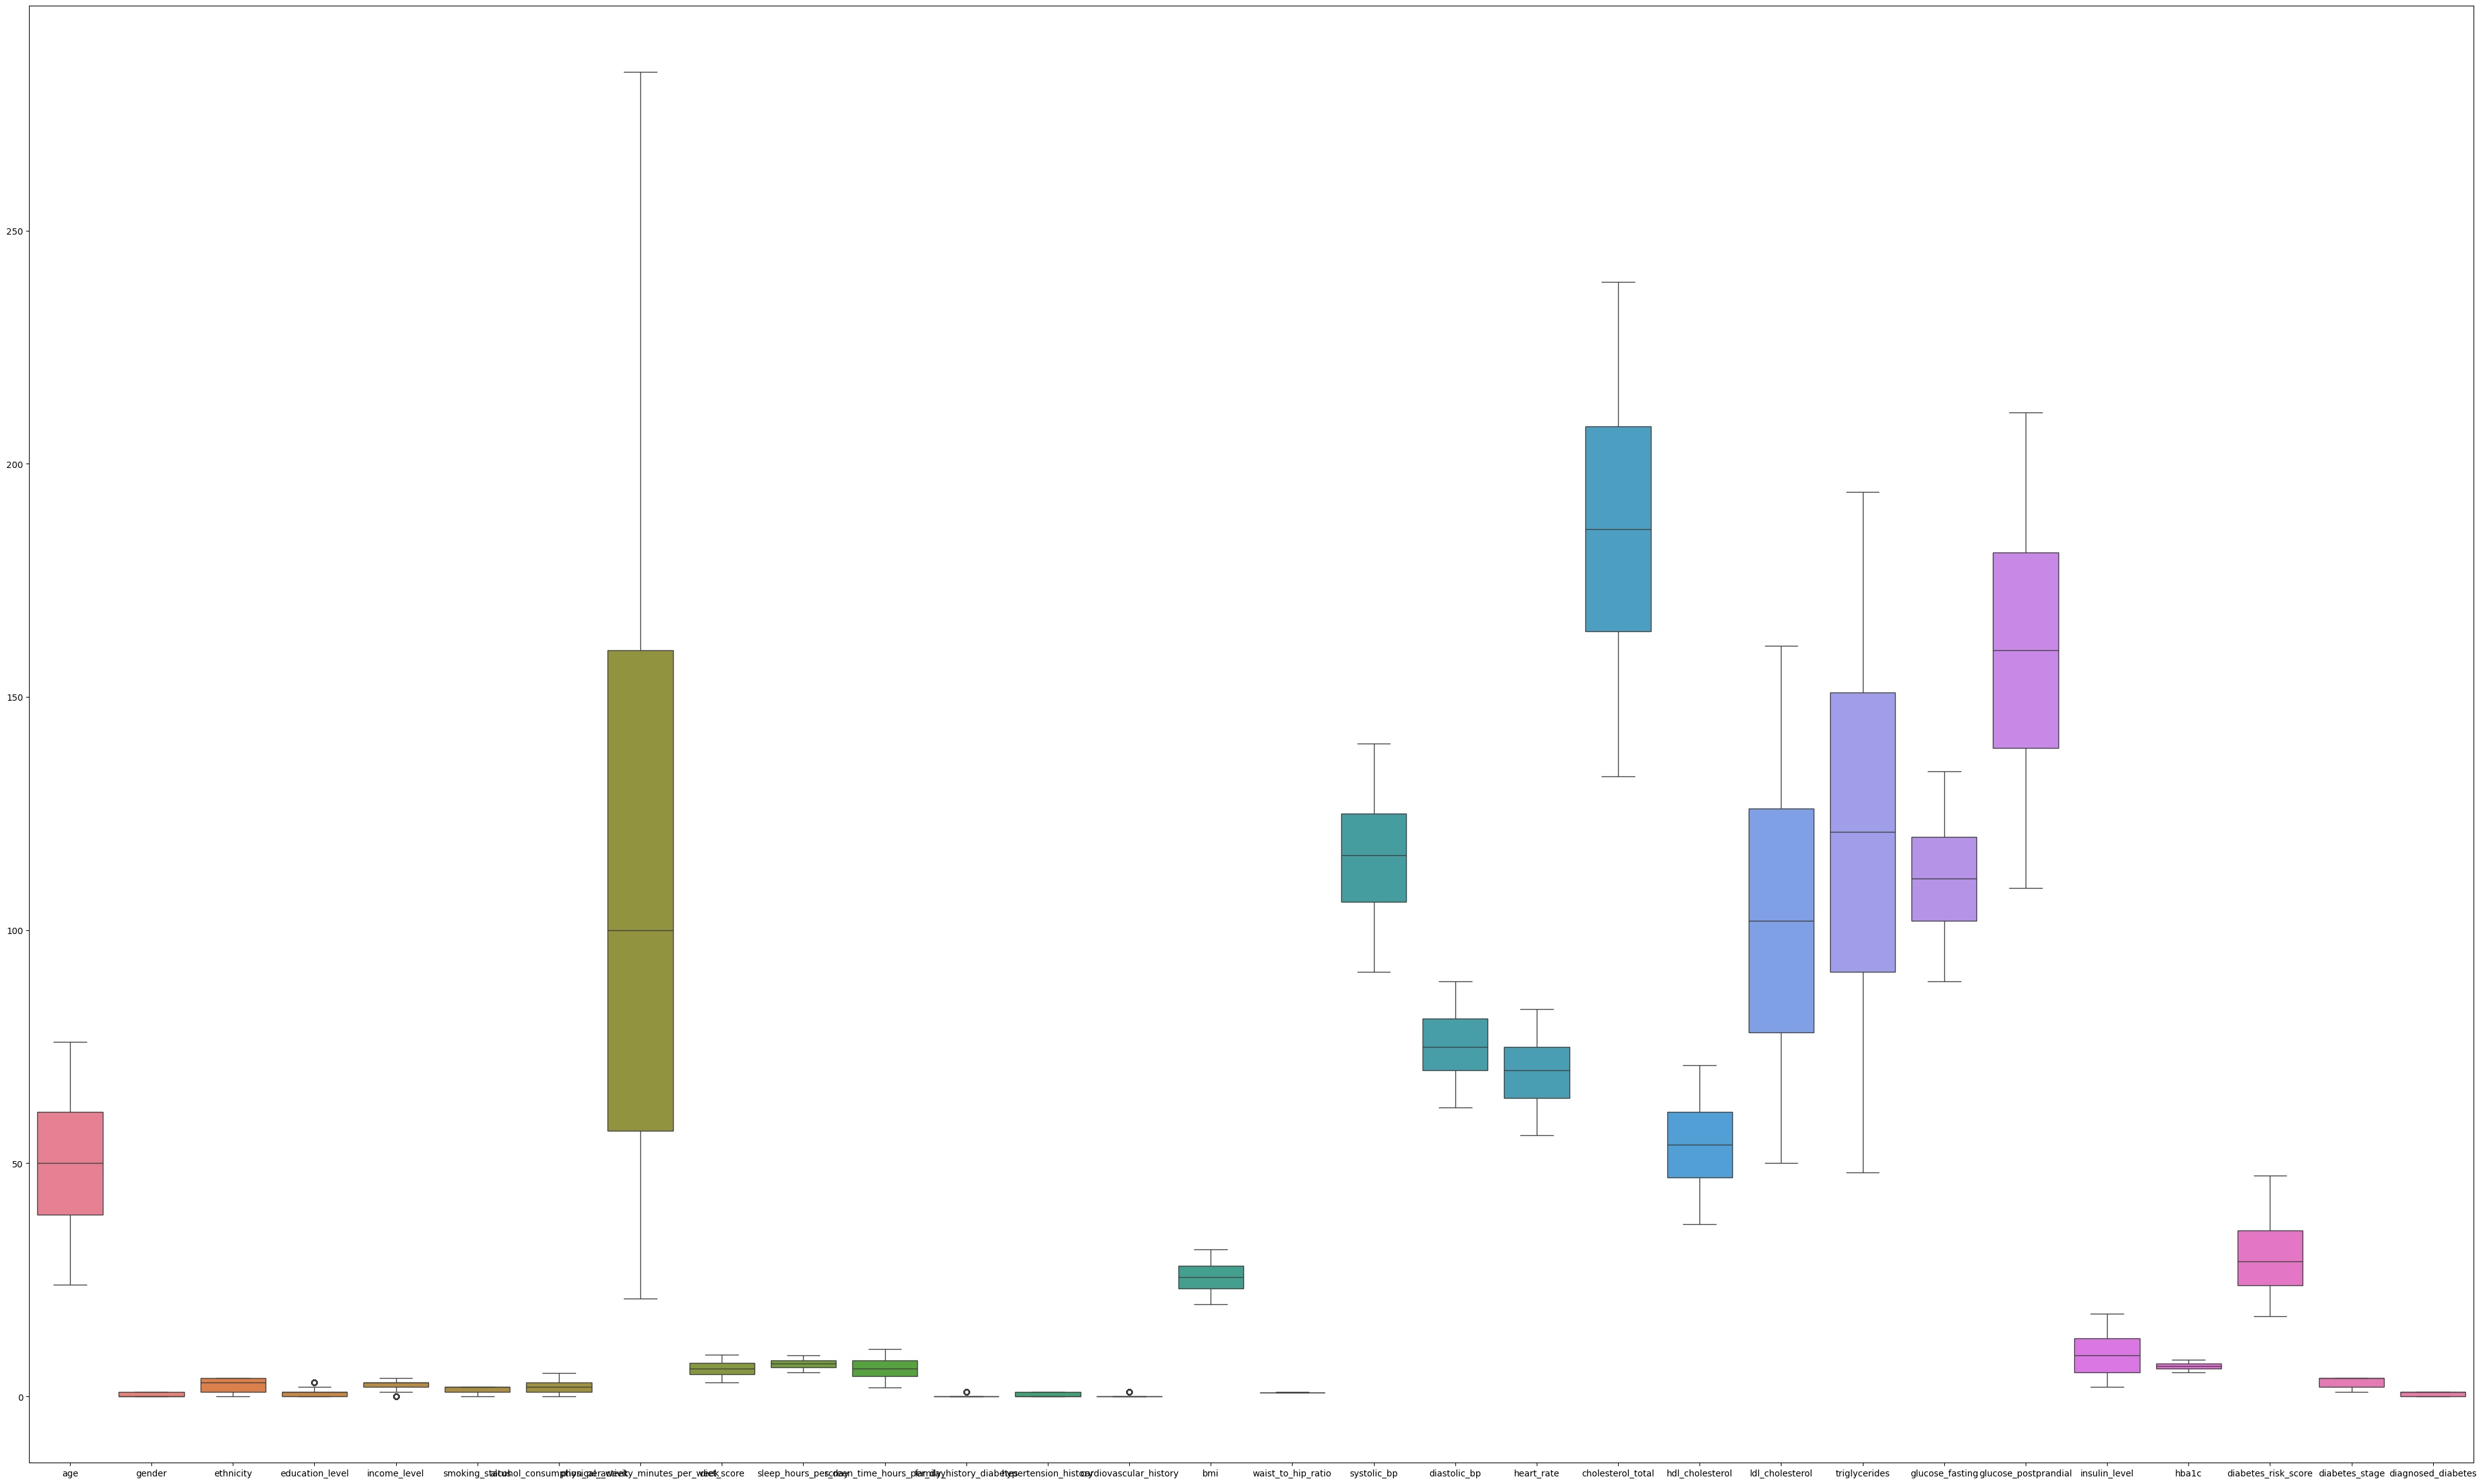

In [121]:
plt.figure(figsize=(50,30))
sns.boxplot(data)

<Axes: >

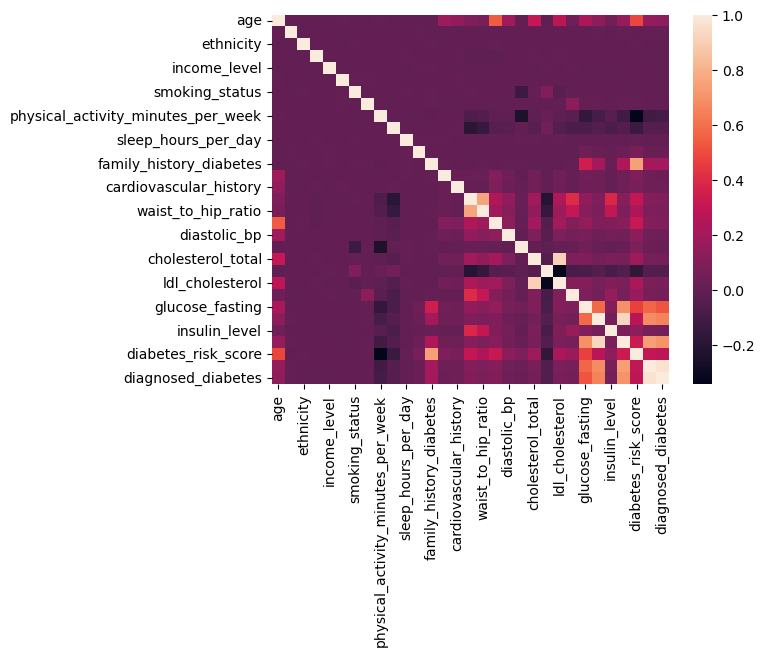

In [133]:
c=data.corr()
sns.heatmap(c)

# Split data into Train data and Test data

In [136]:
x=data.iloc[:,:-1]
x.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage
0,58,1,0,1,2,0,2,0,215,5.7,...,239,41,160,145,134,211,6.36,7.87,29.6,3
1,48,0,4,1,3,0,1,1,143,6.7,...,133,55,50,48,93,150,2.00,5.63,23.0,0
2,60,1,2,1,3,3,2,1,57,6.4,...,213,66,99,48,118,195,5.07,7.51,44.7,3
3,74,0,1,1,1,1,2,0,49,3.4,...,171,50,79,140,134,211,5.28,7.87,38.2,3
4,46,1,4,0,3,1,2,1,109,7.2,...,210,52,125,160,134,184,12.74,7.20,23.5,3


In [138]:
y=data.diagnosed_diabetes
y

0        1
1        0
2        1
3        1
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diagnosed_diabetes, Length: 100000, dtype: int64

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

## Normalization

In [143]:
ss=StandardScaler()
X_train =ss.fit_transform(x_train)
X_test=ss.transform(x_test)

# MODEL BUILDING

In [259]:
knn=KNeighborsClassifier()
gu=GaussianNB()
be=BernoulliNB()
d=DecisionTreeClassifier(criterion ='entropy')
ada=AdaBoostClassifier()
xgb=XGBClassifier()
grd=GradientBoostingClassifier()
ra=RandomForestClassifier()
s=SVC(kernel='linear')
result=[]
liss=[knn,gu,be,d,ada,xgb,grd,ra,s]
for i in liss:
    print('****************',i,'*****************')
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    result.append(accuracy_score(y_test,y_pred)*100)
    print(classification_report(y_test,y_pred))

**************** KNeighborsClassifier() *****************
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11999
           1       0.99      0.98      0.99     18001

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000

**************** GaussianNB() *****************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11999
           1       1.00      1.00      1.00     18001

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

**************** BernoulliNB() *****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11999
           1       1.00      1.00      1.00     18001

    accuracy               

In [232]:
from sklearn.model_selection import cross_val_score

for model in liss:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model.__class__.__name__} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")



KNeighborsClassifier CV Accuracy: 0.9819 ± 0.0011
GaussianNB CV Accuracy: 0.9978 ± 0.0003
BernoulliNB CV Accuracy: 0.9995 ± 0.0001
DecisionTreeClassifier CV Accuracy: 0.9991 ± 0.0001
AdaBoostClassifier CV Accuracy: 0.9995 ± 0.0002
XGBClassifier CV Accuracy: 0.9994 ± 0.0001
GradientBoostingClassifier CV Accuracy: 0.9994 ± 0.0001
RandomForestClassifier CV Accuracy: 0.9995 ± 0.0001
SVC CV Accuracy: 0.9981 ± 0.0002


In [261]:
result=pd.DataFrame(result, columns=['Normal'])
result

,Normal
0,98.373333
1,99.790000
2,99.963333
3,99.956667
4,99.963333
5,99.963333
6,99.973333
7,99.970000
8,99.796667


In [205]:
# checking if overfitting is occured or not
knn0=KNeighborsClassifier()
gu0=GaussianNB()
be0=BernoulliNB()
ada0=AdaBoostClassifier()
xgb0=XGBClassifier()
grd0=GradientBoostingClassifier()
ra0=RandomForestClassifier()
s0=SVC(kernel='linear')
result0=[]
liss0=[knn0,gu0,be0,ada0,xgb0,grd0,ra0,s0]
for i in liss0:
    print('****************',i,'*****************')
    i.fit(X_train,y_train)
    y0_pred=i.predict(X_train)
    result0.append(accuracy_score(y_train,y0_pred))
    print(classification_report(y_train,y0_pred))

**************** KNeighborsClassifier() *****************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28003
           1       1.00      0.99      0.99     41997

    accuracy                           0.99     70000
   macro avg       0.99      0.99      0.99     70000
weighted avg       0.99      0.99      0.99     70000

**************** GaussianNB() *****************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     28003
           1       1.00      1.00      1.00     41997

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

**************** BernoulliNB() *****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28003
           1       1.00      1.00      1.00     41997

    accuracy               

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28003
           1       1.00      1.00      1.00     41997

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000



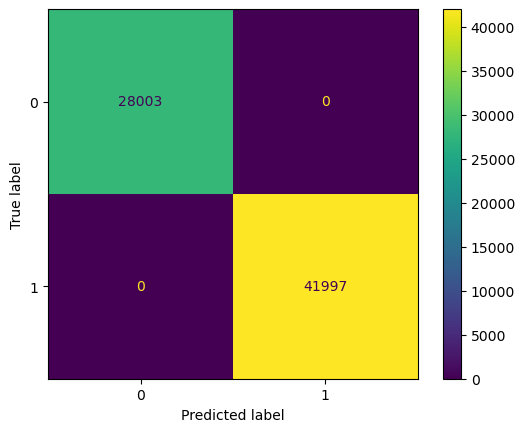

In [206]:
# for displaying the results
dx=DecisionTreeClassifier(criterion ='entropy')
dx.fit(X_train,y_train)
yx_pred=dx.predict(X_train)
print(classification_report(y_train,yx_pred))
print(ConfusionMatrixDisplay.from_predictions(y_train,yx_pred))

## FEATURE SELECTION

In [183]:
data.corr()['diagnosed_diabetes'].sort_values(ascending=False)

diagnosed_diabetes                    1.000000
diabetes_stage                        0.966936
hba1c                                 0.704299
glucose_postprandial                  0.650285
glucose_fasting                       0.520718
diabetes_risk_score                   0.276135
family_history_diabetes               0.197926
age                                   0.137332
bmi                                   0.096570
systolic_bp                           0.094880
waist_to_hip_ratio                    0.077671
ldl_cholesterol                       0.066896
cholesterol_total                     0.057415
insulin_level                         0.057078
triglycerides                         0.056152
diastolic_bp                          0.034916
cardiovascular_history                0.029793
hypertension_history                  0.027524
heart_rate                            0.022119
screen_time_hours_per_day             0.018377
gender                                0.003127
ethnicity    

In [185]:
x1=x.drop(['hdl_cholesterol','diet_score','income_level','education_level','employment_status','smoking_status','sleep_hours_per_day','alcohol_consumption_per_week','ethnicity','gender','screen_time_hours_per_day','heart_rate','hypertension_history','cardiovascular_history','diastolic_bp','triglycerides','insulin_level','cholesterol_total','ldl_cholesterol','waist_to_hip_ratio','systolic_bp','bmi'],axis=1)
x1

,age,physical_activity_minutes_per_week,family_history_diabetes,glucose_fasting,glucose_postprandial,hba1c,diabetes_risk_score,diabetes_stage
0,58,215,0,134,211,7.87,29.6,3
1,48,143,0,93,150,5.63,23.0,0
2,60,57,1,118,195,7.51,44.7,3
3,74,49,0,134,211,7.87,38.2,3
4,46,109,0,134,184,7.20,23.5,3
...,...,...,...,...,...,...,...,...
99995,46,136,0,113,109,5.55,26.0,1
99996,41,76,0,96,146,5.97,24.4,1
99997,57,121,0,93,132,5.21,27.6,0
99998,47,52,0,106,117,5.53,26.4,1


In [187]:
x1=ss.fit_transform(x1)

In [189]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=0.3,random_state=1)

In [263]:
knn1=KNeighborsClassifier()
gu1=GaussianNB()
be1=BernoulliNB()
d1=DecisionTreeClassifier(criterion ='entropy')
ada1=AdaBoostClassifier()
xgb1=XGBClassifier()
grd1=GradientBoostingClassifier()
ra1=RandomForestClassifier()
s1=SVC(kernel='linear')
result1=[]
liss1=[knn1,gu1,be1,d1,ada1,xgb1,grd1,ra1,s1]
for i in liss1:
    print('****************',i,'*****************')
    i.fit(x1_train,y1_train)
    y1_pred=i.predict(x1_test)
    result1.append(accuracy_score(y1_test,y1_pred)*100)
    print(classification_report(y1_test,y1_pred))

**************** KNeighborsClassifier() *****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11999
           1       1.00      1.00      1.00     18001

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

**************** GaussianNB() *****************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11999
           1       1.00      1.00      1.00     18001

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

**************** BernoulliNB() *****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11999
           1       1.00      1.00      1.00     18001

    accuracy               

In [265]:
result1=pd.DataFrame(result1, columns=['Feature Selection'])
result1

,Feature Selection
0,99.916667
1,99.790000
2,99.963333
3,99.936667
4,99.956667
5,99.946667
6,99.953333
7,99.973333
8,99.796667


In [213]:
y.value_counts()

diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

# OVERSAMPLING

In [216]:
x2=x.drop(['hdl_cholesterol','diet_score','income_level','education_level','employment_status','smoking_status','sleep_hours_per_day','alcohol_consumption_per_week','ethnicity','gender','screen_time_hours_per_day','heart_rate','hypertension_history','cardiovascular_history','diastolic_bp','triglycerides','insulin_level','cholesterol_total','ldl_cholesterol','waist_to_hip_ratio','systolic_bp','bmi'],axis=1)
x2

,age,physical_activity_minutes_per_week,family_history_diabetes,glucose_fasting,glucose_postprandial,hba1c,diabetes_risk_score,diabetes_stage
0,58,215,0,134,211,7.87,29.6,3
1,48,143,0,93,150,5.63,23.0,0
2,60,57,1,118,195,7.51,44.7,3
3,74,49,0,134,211,7.87,38.2,3
4,46,109,0,134,184,7.20,23.5,3
...,...,...,...,...,...,...,...,...
99995,46,136,0,113,109,5.55,26.0,1
99996,41,76,0,96,146,5.97,24.4,1
99997,57,121,0,93,132,5.21,27.6,0
99998,47,52,0,106,117,5.53,26.4,1


In [218]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=1)
x_os,y_os=sm.fit_resample(x2,y)

In [220]:
x_os.value_counts()
y_os.value_counts()

diagnosed_diabetes
1    59998
0    59998
Name: count, dtype: int64

In [222]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x_os,y_os,test_size=0.3,random_state=1)

In [224]:
X2_train =ss.fit_transform(x2_train)
X2_test=ss.transform(x2_test)

In [267]:
knn2=KNeighborsClassifier()
gu2=GaussianNB()
be2=BernoulliNB()
d2=DecisionTreeClassifier(criterion ='entropy')
ada2=AdaBoostClassifier()
xgb2=XGBClassifier()
grd2=GradientBoostingClassifier()
ra2=RandomForestClassifier()
s2=SVC(kernel='linear')
result2=[]
liss2=[knn2,gu2,be2,d2,ada2,xgb2,grd2,ra2,s2]
for i in liss2:
    print('****************',i,'*****************')
    i.fit(X2_train,y2_train)
    y2_pred=i.predict(X2_test)
    result2.append(accuracy_score(y2_test,y2_pred)*100)
    print(classification_report(y2_test,y2_pred))

**************** KNeighborsClassifier() *****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17985
           1       1.00      1.00      1.00     18014

    accuracy                           1.00     35999
   macro avg       1.00      1.00      1.00     35999
weighted avg       1.00      1.00      1.00     35999

**************** GaussianNB() *****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17985
           1       1.00      1.00      1.00     18014

    accuracy                           1.00     35999
   macro avg       1.00      1.00      1.00     35999
weighted avg       1.00      1.00      1.00     35999

**************** BernoulliNB() *****************
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     17985
           1       0.99      1.00      1.00     18014

    accuracy               

In [269]:
result2=pd.DataFrame(result2, columns=['Over-Sample'])
result2

,Over-Sample
0,99.936109
1,99.844440
2,99.574988
3,99.949999
4,99.963888
5,99.966666
6,99.961110
7,99.972221
8,99.855552


# UNDER SAMPLE

In [237]:
from imblearn.under_sampling import RandomUnderSampler
ru=RandomUnderSampler(random_state=1)
x_us,y_us=ru.fit_resample(x2,y)

In [239]:
x_us.value_counts()
y_us.value_counts()

diagnosed_diabetes
0    40002
1    40002
Name: count, dtype: int64

In [241]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x_us,y_us,test_size=0.3,random_state=1)

In [243]:
X3_train =ss.fit_transform(x3_train)
X3_test=ss.transform(x3_test)

In [255]:
knn3=KNeighborsClassifier()
gu3=GaussianNB()
be3=BernoulliNB()
d3=DecisionTreeClassifier(criterion ='entropy')
ada3=AdaBoostClassifier()
xgb3=XGBClassifier()
grd3=GradientBoostingClassifier()
ra3=RandomForestClassifier()
s3=SVC(kernel='linear')
result3=[]
liss3=[knn3,gu3,be3,d3,ada3,xgb3,grd3,ra3,s3]
for i in liss3:
    print('****************',i,'*****************')
    i.fit(X3_train,y3_train)
    y3_pred=i.predict(X3_test)
    result3.append(accuracy_score(y3_test,y3_pred)*100)
    print(classification_report(y3_test,y3_pred))

**************** KNeighborsClassifier() *****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12044
           1       1.00      1.00      1.00     11958

    accuracy                           1.00     24002
   macro avg       1.00      1.00      1.00     24002
weighted avg       1.00      1.00      1.00     24002

**************** GaussianNB() *****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12044
           1       1.00      1.00      1.00     11958

    accuracy                           1.00     24002
   macro avg       1.00      1.00      1.00     24002
weighted avg       1.00      1.00      1.00     24002

**************** BernoulliNB() *****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12044
           1       1.00      1.00      1.00     11958

    accuracy               

In [257]:
result3=pd.DataFrame(result3, columns=['Under-Sample'])
result3

,Under-Sample
0,99.933339
1,99.837514
2,99.695859
3,99.950004
4,99.975002
5,99.970836
6,99.970836
7,99.970836
8,99.841680


In [271]:
Final = pd.concat([result,result1,result2,result3], axis=1)
Final

,Normal,Feature Selection,Over-Sample,Under-Sample
0,98.373333,99.916667,99.936109,99.933339
1,99.790000,99.790000,99.844440,99.837514
2,99.963333,99.963333,99.574988,99.695859
3,99.956667,99.936667,99.949999,99.950004
4,99.963333,99.956667,99.963888,99.975002
5,99.963333,99.946667,99.966666,99.970836
6,99.973333,99.953333,99.961110,99.970836
7,99.970000,99.973333,99.972221,99.970836
8,99.796667,99.796667,99.855552,99.841680


In [273]:
Final.index=['KNN','GNB','BNB','DTC','ADA','XGB','GBC','RFC','SVC']
Final

,Normal,Feature Selection,Over-Sample,Under-Sample
KNN,98.373333,99.916667,99.936109,99.933339
GNB,99.790000,99.790000,99.844440,99.837514
BNB,99.963333,99.963333,99.574988,99.695859
DTC,99.956667,99.936667,99.949999,99.950004
ADA,99.963333,99.956667,99.963888,99.975002
XGB,99.963333,99.946667,99.966666,99.970836
GBC,99.973333,99.953333,99.961110,99.970836
RFC,99.970000,99.973333,99.972221,99.970836
SVC,99.796667,99.796667,99.855552,99.841680


In [275]:
# we are going to take decision tree for predicting a new value and aslo for deploy 
# because decision tree is best for healthcare predicitons and taking after feature selection decision tree
new_pred=d1.predict([[22,105,10,88,123,4.6,21.4,0]])
new_pred

array([1], dtype=int64)

In [277]:
# save for deploy
pickle.dump(d1,open('model_Decision_tree_sav','wb'))
pickle.dump(ss,open('scaler_Decision_tree_sav','wb'))
pickle.dump(lb,open('encoder_Decision_tree_sav','wb'))